# Data3(제휴사 이용 정보) 분석

In [34]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# set needed variables
plt.rcParams['font.family'] = 'Malgun Gothic' # font
cop_order = ['B01', 'C01', 'C02', 'D01', 'D02', 'E01']

In [36]:
# read data
data3 = pd.read_csv("../Data/privateData/LPOINT_BIG_COMP_03_COP_U.csv", low_memory=False)
data3.head()

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500


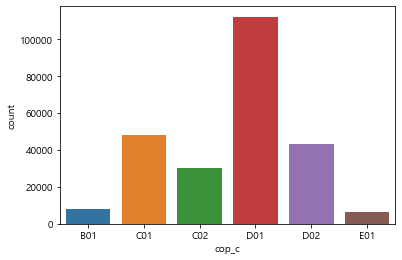

In [37]:
# 제휴사 비교
sns.countplot(data=data3, x='cop_c', order=cop_order)
plt.show()

* B: 숙박업종, C: 엔터테인먼트, D: F&B, E: 렌탈업종
* 제휴사 D01의 이용 비중이 가장 높다
* 전반적으로 F&B(Foodservice) 이용 비중이 높다

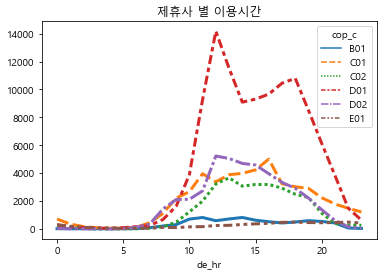

In [38]:
# 제휴사 별 이용시간 비교
pivot = pd.pivot_table(data = data3, index = "de_hr", columns = "cop_c", aggfunc = "size", fill_value = 0) 
sns.lineplot(data = pivot, linewidth = 3).set_title("제휴사 별 이용시간")
plt.show()

* D01(F&B)의 특성에 맞게 점심/저녁 시간에 이용시간이 많다

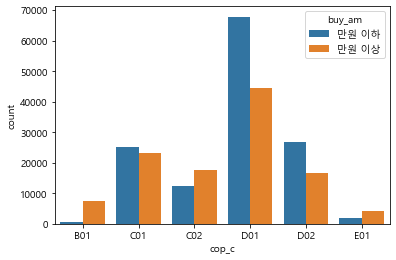

In [39]:
# 제휴사 별 이용금액 비교
data3.buy_am = data3.buy_am.apply(lambda x: '만원 이하' if x < 10000 else '만원 이상')
sns.countplot(data=data3, x='cop_c', hue='buy_am', order=cop_order, hue_order=['만원 이하', '만원 이상'])
plt.show()

* 업종에 맞는 이용금액 분포를 보인다

---
# Data3(제휴사 이용 정보) 분석 결과
* Food service 관련 제휴사 이용 비중이 높다
* 이에 따른 이용시간/이용금액 분포를 보인다